In [4]:
%matplotlib inline
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn
import sympy as sm
#import sympy.physics.vector as vc
#sm.init_printing()

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Προσέγγιση Euler με σταθερή θέση ήλιου και $M_{\odot} >> m$
Σε ένα τυχαίο σύστημα συντεταγμένων ορίζουμε τη θέση του ήλιου $\vec{R}_{\odot}$ και τη θέση της γής $\vec{R}$ άρα η απόσταση Γης-Ηλιου θα έιναι $\vec{r} =\vec{R}- \vec{R}_{\odot}$.
Οι εξισώσεις κίνησεις θα είναι:
$$ 
m\ddot{\vec{R}}=-G\frac{M_{\odot}m}{r^3} \vec{r}\Rightarrow \ddot{\vec{R}} = -\frac{GM_{\odot}}{|\vec{R}- \vec{R}_{\odot}|^3} (\vec{R}- \vec{R}_{\odot}) \\
M_{\odot}\ddot{\vec{R}}_{\odot}=-G\frac{M_{\odot}m}{r^3} \vec{r}\Rightarrow \ddot{\vec{R}}_{\odot} = -\frac{Gm}{|\vec{R}- \vec{R}_{\odot}|^3} (\vec{R}- \vec{R}_{\odot})$$
άρα
$$ \ddot{\vec{r}}=-G\frac{M_{\odot}+m}{|r|^3}\vec{r}$$

Αν θέσουμε σαν $\vec{v}=\dot{\vec{r}}$ τότε:
$$
\dot{\vec{r}}=\vec{v} \\
\dot{\vec{v}}=-G\frac{M_{\odot}+m}{|r|^3}\vec{r}
$$
άρα
$$
\dot{x}=v_x \\
\dot{y}=v_y \\
\dot{v_x}=-G\frac{M_{\odot}+m}{|x^2+y^2|^{3/2}}x \\
\dot{v_y}=-G\frac{M_{\odot}+m}{|x^2+y^2|^{3/2}}y \\
$$

Αν διαμερίσουμε το χρόνο σε μικρά χρονικά διαστήματα $\delta t$ μπορούμε να λύσουμε το σύστημα των διαφορικών εξισώσεων μέσω της τεχνικής Euler:
$$
x_n=v_x \delta t +x_{n-1} \\
y_n=v_y \delta t +y_{n-1} \\
v_{x,n}=-\delta t \, G\frac{M_{\odot}+m}{|x_n^2+y_n^2|^{3/2}}x_n+v_{x,n-1} \\
v_{y,n}=-\delta t \, G\frac{M_{\odot}+m}{|x_n^2+y_n^2|^{3/2}}y_n+v_{y,n-1} \\
$$
Αν θεωρήσουμε ότι $M_{\odot}>>m$ και αντικαταστήσουμε με τη βαρυτική σταθερά gauss:
$$
κ= 0.0172 \, \frac{\text{au}^{3/2}}{\text{days}\,M^{1/2}_{\odot}}
$$
τότε
$$
x_n=v_x \delta t +x_{n-1} \\
y_n=v_y \delta t +y_{n-1} \\
v_{x,n}=- \frac{k^2 x_n }{(x_n^2+y_n^2)^{3/2}}\delta t+v_{x,n-1} \\
v_{y,n}=- \frac{k^2 y_n}{(x_n^2+y_n^2)^{3/2}}\delta t +v_{y,n-1} \\
$$

In [197]:
k=0.0172 #gaussian gravity consants au^(3/2) days^(-1) solarMass^(-1/2)
C=k**2

In [198]:
def Uderv(x,y):
    r=np.sqrt(x**2+y**2)
    fvx=-C*x/r**3
    fvy=-C*y/r**3
    return (fvx,fvy)

In [199]:
dt=0.5 #χρονικό δίαστημα 
T=np.arange(0.,1.*365.25,dt) #Πίνακας χρόνων σε μέρες

In [200]:
#pt=PrettyTable(['n','x','y','Vx','Vy','fx','fy'])
N=len(T)
x = np.zeros(N)
y = np.zeros(N)
Ux = np.zeros(N)
Uy = np.zeros(N)
x[0]=1.
y[0]=0.
Ux[0]=0.
Uy[0]=0.0172

for n,t in enumerate(T[1:]):
    #pt.add_row([n,X[n],Y[n],Ux[n],Uy[n],-C*dt*X[n]/r**3,-C*dt*Y[n]/r**3])
    x[n+1] = x[n] + dt*Ux[n]
    y[n+1] = y[n] + dt*Uy[n]
    
    fvx,fvy=Uderv(x[n],y[n]) #Euler
    #fvx,fvy=Uderv(X[n+1],Y[n+1]) #Symplectic Euler
    Ux[n+1] = Ux[n] + dt*fvx
    Uy[n+1] = Uy[n] + dt*fvy

R=np.sqrt(x**2+y**2)
E=0.5*(Ux**2+Uy**2)-C/R
V=np.sqrt(Ux**2+Uy**2)
#print pt

In [201]:
e=0.0167
phi=np.linspace(0.,2.*np.pi,len(x))
rr=(1.-e**2)/(1.+e*np.cos(phi-np.pi/2.))
xx=rr*np.cos(phi)
yy=rr*np.sin(phi)

fig=plt.figure(figsize=(16,12))
gs=gridspec.GridSpec(3,4)
ax1=plt.subplot(gs[0:2,0:2])
ax1.plot(x,y,label='Earth Orbit (numerical)')
ax1.plot([0],[0],'o',label='Sun Position')
ax1.axis(xmin=-1.3,xmax=1.3,ymin=-1.3,ymax=1.3)
ax1.set_ylabel('Y Position (au)')
ax1.set_xlabel('X Position (au)')
ax1.plot(xx,yy,label='Earth Orbit (true)')
ax1.legend(loc='best')
ax2=plt.subplot(gs[2,:])
#ax2.plot(T,vx,label='X Velocity')
#ax2.plot(T,vy,label='Y Velocity')
ax2.plot(T,np.abs(R-rr),label='Error')
ax2.set_ylabel('Difference (au)')
ax2.set_xlabel('Time (days)')
ax2.legend(loc='best')

In [203]:
eps=2.
PT =[np.where(np.logical_and(T<365.25*k+eps,T>365.25*k-eps))[0][0] for k in range(int(T[-1]/365.25))]

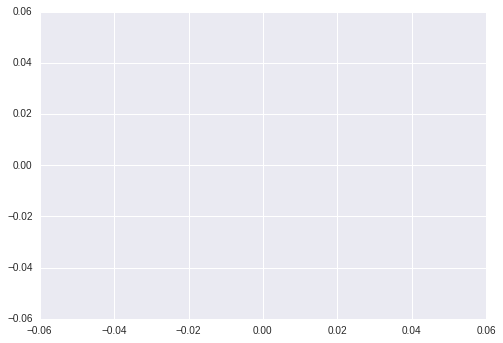

In [204]:
plt.plot(np.abs(V[PT]-V[0]))
plt.plot(np.abs(R[PT]-R[0]))

# Implicit Euler

H impicit μέθοδος Euler γράφεται:
$$
x_n=v_x \delta t +x_{n} \\
y_n=v_y \delta t +y_{n} \\
v_{x,n}=- \frac{C x_n }{(x_n^2+y_n^2)^{3/2}}\delta t+v_{x,n} \\
v_{y,n}=- \frac{C y_n}{(x_n^2+y_n^2)^{3/2}}\delta t +v_{y,n} \\
$$
άρα θα πρέπει να λύσουμε τις εξισώσεις:
$$
\mathbf{F}(\mathbf{X})=\mathbf{F}(x_0,x_1,x_2,x_3)
\left( \begin{array}{c}
x_0 -dt x_2 -x_n\\
x_1 -dt x_3 -y_n \\
x_2 +dt C \frac{x_0}{r^3} -V_{x,n}\\
x_3 +dt C \frac{x_1}{r^3} -V_{y,n}
\end{array} \right) 
=0
$$
όπου 
$$
\mathbf{X}=(x_0,x_1,x_2,x_3)=(x,y,V_x,V_y)
$$

Οι εξισώσεις αυτές θα λυθούνε με την μέθοδο Newton:
$$
\mathbf{X_{i+1}}=\mathbf{X_i}-\mathbf{J}^{-1} \mathbf{F}(\mathbf{X_i})
$$
δηλαδη τη μέθοδο Newton για πολλες εξισώσεις. 
Η ιακωβιανή είναι:
$$
\mathbf{J} =
\left( \begin{array}{cccc}
1 & 0 & -dt & 0 \\
0 & 1 & 0 & -dt \\
\frac{Cdt}{r^3}-\frac{3 C dt x_0}{r^5} & \frac{-3 C dt x_0 x_1 }{r^5} & 1 & 0 \\
\frac{-3 C dt x_0 x_1 }{r^5} & \frac{Cdt}{r^3}-\frac{3 C dt x_1}{r^5} & 0 & 1
\end{array} \right) 
$$

Παρακάτω σας δείχνω και πως μπορείς να το βρείς με τη βιβλιοθήκη Sympy:

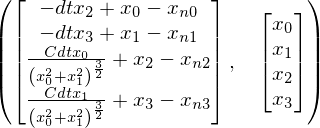

In [205]:
sm.init_printing(use_unicode=False, wrap_line=False, no_global=True)

x0,x1,x2,x3,xn0,xn1,xn2,xn3,dt,C=sm.symbols('x_0,x_1,x_2,x_3,x_n0,x_n1,x_n2,x_n3,dt,C')
r=sm.sqrt(x0**2+x1**2)
F=sm.Matrix([x0-xn0-dt*x2,
           x1-xn1-dt*x3,
           x2-xn2+dt*C*x0/r**3,
          x3-xn3+dt*C*x1/r**3])
X=sm.Matrix([x0,x1,x2,x3])
F,X

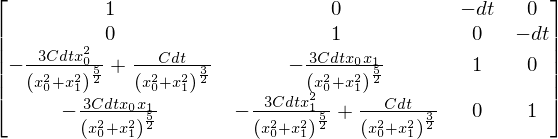

In [206]:
F.jacobian(X)

In [246]:
def F(X,X0,dt,C): #Ο πινακας F
    r=np.sqrt(X[0]**2+X[1]**2)
    f0=X[0]-X0[0]-dt*X[2]
    f1=X[1]-X0[1]-dt*X[3]
    f2=X[2]-X0[2]+dt*C*X[0]/r**3
    f3= X[3]-X0[3]+dt*C*X[1]/r**3
    return np.array([f0,f1,f2,f3])

def JF(X,dt,C): #H Ιακωβιανη
    r=np.sqrt(X[0]**2+X[1]**2)
    return np.array([[1.,0.,-dt,0.],
                     [0.,1.,0.,-dt],
                     [C*dt*(r**(-3)-3.*X[0]/r**5),-3.*X[0]*X[1]*dt*C/r**5,1.,0.],
                     [-3.*X[0]*X[1]*dt*C/r**5,C*dt*(r**(-3)-3.*X[1]/r**5),0.,1.]])

def Newton(X0,dt,C): #Η μέθοδος Νευτωνα
    Xr=X0
    e=1e-8
    d=np.ones(4)
    while np.all(d>e): #Τρέχει μέχρι η διαφορα Xn+1 με Xn να ειναι μικροτερη απο e=10^-8
        Fn=F(Xr,X0,dt,C)
        DF=JF(Xr,dt,C)
        iDF=np.linalg.inv(DF)
        Xp=Xr
        Xr = Xp-np.dot(Fn,iDF)
        d=np.abs(Xr-Xp)
    return Xr

In [247]:
from scipy.optimize import root

In [ ]:
dt=0.7 #χρονικό δίαστημα 
T=np.arange(0.,1.*365.25,dt) #Πίνακας χρόνων σε μέρες
N=len(T)
C=k**2
x = np.zeros(N)
y = np.zeros(N)
Ux = np.zeros(N)
Uy = np.zeros(N)
x[0]=1.
y[0]=0.
Ux[0]=0.
Uy[0]=0.0172

for n,t in enumerate(T[1:]):
    X=np.array([x[n],y[n],Ux[n],Uy[n]])
    FF=Newton(X,dt,C)
    #FF=root(fun=F,x0=X,args=(X,dt,C),jac=False)
    x[n+1] = FF[0]
    y[n+1] = FF[1]
    Ux[n+1] = FF[2]
    Uy[n+1] = FF[3]

R=np.sqrt(x**2+y**2)
E=0.5*(Ux**2+Uy**2)-C/R
V=np.sqrt(Ux**2+Uy**2)

In [ ]:
e=0.0167
phi=np.linspace(0.,2.*np.pi,len(x))
rr=(1.-e**2)/(1.+e*np.cos(phi-np.pi/2.))
xx=rr*np.cos(phi)
yy=rr*np.sin(phi)

fig=plt.figure(figsize=(16,12))
gs=gridspec.GridSpec(3,4)
ax1=plt.subplot(gs[0:2,0:2])
ax1.plot(x,y,label='Earth Orbit (numerical)')
ax1.plot([0],[0],'o',label='Sun Position')
ax1.axis(xmin=-1.3,xmax=1.3,ymin=-1.3,ymax=1.3)
ax1.set_ylabel('Y Position (au)')
ax1.set_xlabel('X Position (au)')
ax1.plot(xx,yy,label='Earth Orbit (true)')
ax1.legend(loc='best')
ax2=plt.subplot(gs[2,:])
#ax2.plot(T,vx,label='X Velocity')
#ax2.plot(T,vy,label='Y Velocity')
ax2.plot(T,np.abs(R-rr),label='Error')
ax2.set_ylabel('Difference (au)')
ax2.set_xlabel('Time (days)')
ax2.legend(loc='best')

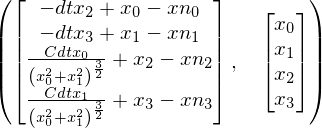

In [239]:
x

array([  1.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  n

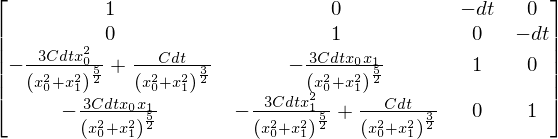

In [46]:
np.dot(Fn,iDF)

array([-3.,  0., -2.,  0.])

In [51]:
Newton([1.,0.,0.,0.],1.,0.,0.,0.,1.,1.)

array([-6.58301223,  0.        , -3.65899738,  0.        ])